In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, auc, roc_curve
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [4]:
data = pd.read_csv("creditcard.csv")
print(data.shape)
data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

In [8]:
print(data['Class'].value_counts())
print('Valid Transactions: ', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')

print('Fraudulent Transactions: ', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')


Class
0    284315
1       492
Name: count, dtype: int64
Valid Transactions:  99.83 % of the dataset
Fraudulent Transactions:  0.17 % of the dataset


C:\Users\Anurag Katkar\AppData\Local\Temp\ipykernel_3340\2205523652.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Class', data=data, palette=colors)


<Axes: xlabel='Class', ylabel='count'>

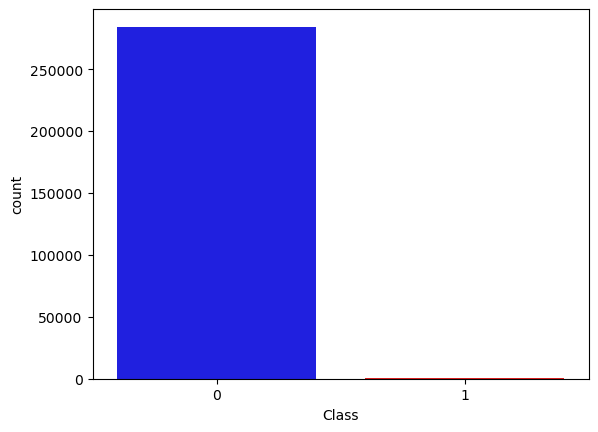

In [9]:
colors = ['blue','red']
sns.countplot(x = 'Class', data=data, palette=colors)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.3, random_state=0)


In [11]:
print("Transactions in X_train dataset: ", X_train.shape)
print("Transaction classes in y_train dataset: ", y_train.shape)

print("Transactions in X_test dataset: ", X_test.shape)
print("Transaction classes in y_test dataset: ", y_test.shape)

Transactions in X_train dataset:  (199364, 30)
Transaction classes in y_train dataset:  (199364, 1)
Transactions in X_test dataset:  (85443, 30)
Transaction classes in y_test dataset:  (85443, 1)


In [12]:
scaler_amount = StandardScaler()
scaler_time = StandardScaler()

In [13]:
X_train['normAmount'] = scaler_amount.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['normAmount'] = scaler_amount.transform(X_test['Amount'].values.reshape(-1,1))

X_train['normTime'] = scaler_time.fit_transform(X_train['Time'].values.reshape(-1,1))
X_test['normTime'] = scaler_time.transform(X_test['Time'].values.reshape(-1,1))

X_train = X_train.drop(['Time', 'Amount'], axis=1)
X_test = X_test.drop(['Time', 'Amount'], axis=1)

X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,normTime
161145,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,...,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,-0.165692,0.402560
204520,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,...,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,-0.352239,0.853047
182659,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,...,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,0.330886,0.646288
25117,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,...,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,-0.336067,-1.290102
227642,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,...,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,0.005211,1.060059


In [14]:
print("Before over-sampling:\n", y_train['Class'].value_counts())

Before over-sampling:
 Class
0    199019
1       345
Name: count, dtype: int64


In [16]:
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train['Class'])

In [17]:
print("After over-sampling:\n", y_train_res.value_counts())

After over-sampling:
 Class
0    199019
1    199019
Name: count, dtype: int64


In [18]:
parameters = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lr = LogisticRegression()
clf = GridSearchCV(lr, param_grid=parameters, cv=5, verbose=5, n_jobs=3)

k = clf.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


c:\Users\Anurag Katkar\anaconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Anurag Katkar\anaconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Anurag Katkar\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Anurag Katkar\anaconda3\envs\ml\Lib\site-packages\skle

In [19]:
print(k.best_params_)

{'C': 1000, 'penalty': 'l2'}


In [20]:
lr_gridcv_best = clf.best_estimator_

In [21]:
y_test_pre = lr_gridcv_best.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test, y_test_pre)

In [22]:
print("Recall metric in the test dataset:", (cnf_matrix_test[1,1]/(cnf_matrix_test[1,0]+cnf_matrix_test[1,1] )))

Recall metric in the test dataset: 0.9183673469387755


In [23]:
y_train_pre = lr_gridcv_best.predict(X_train_res)
cnf_matrix_train = confusion_matrix(y_train_res, y_train_pre)

In [24]:
print("Recall metric in the train dataset:", (cnf_matrix_train[1,1]/(cnf_matrix_train[1,0]+cnf_matrix_train[1,1] )))


Recall metric in the train dataset: 0.9175103884553736


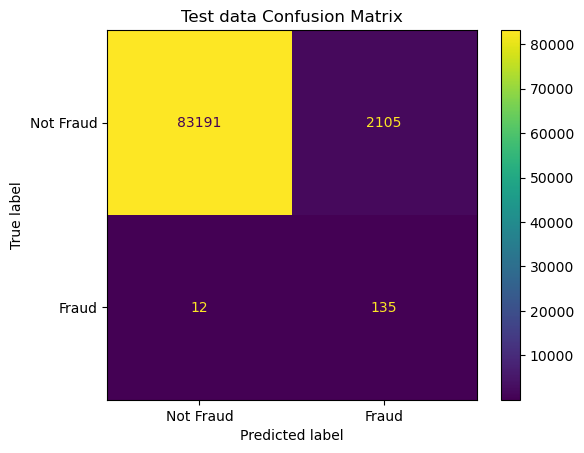

In [ ]:
class_names = ['Not Fraud', 'Fraud']

ConfusionMatrixDisplay.from_estimator(k, X_test, y_test, values_format = '.5g', display_labels=class_names)
plt.title("Test data Confusion Matrix")
plt.show()

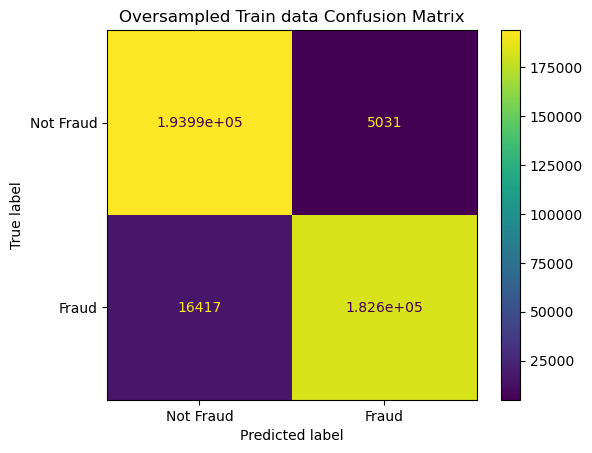

In [31]:
ConfusionMatrixDisplay.from_estimator(k, X_train_res, y_train_res,  values_format = '.5g', display_labels=class_names) 
plt.title("Oversampled Train data Confusion Matrix")
plt.show()

In [32]:
y_k = k.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_k)
roc_auc = auc(fpr, tpr)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.983838193878189


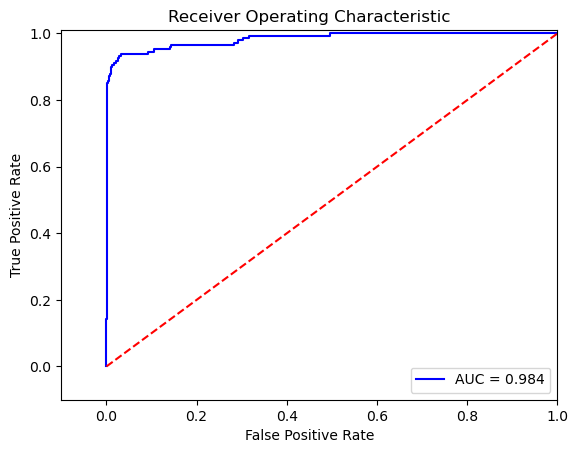

In [33]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()